In [2]:
from dynasigml.dynasig_df import combine_pickled_dynasig_dfs
import glob

# Combining pre-computed DSDF objects
separate_dsdfs = glob.glob("split_dsdfs/*.pickle")
combine_pickled_dynasig_dfs(separate_dsdfs, "combined_dsdf")

Finished training LASSO model with beta=0.04978706836786395 and alpha=3.0517578125e-05
Finished training LASSO model with beta=0.04978706836786395 and alpha=6.103515625e-05
Finished training LASSO model with beta=0.04978706836786395 and alpha=0.0001220703125
Finished training LASSO model with beta=0.04978706836786395 and alpha=0.000244140625
Finished training LASSO model with beta=0.04978706836786395 and alpha=0.00048828125
Finished training LASSO model with beta=0.04978706836786395 and alpha=0.0009765625
Finished training LASSO model with beta=0.04978706836786395 and alpha=0.001953125
Finished training LASSO model with beta=0.04978706836786395 and alpha=0.00390625
Finished training LASSO model with beta=0.04978706836786395 and alpha=0.0078125
Finished training LASSO model with beta=0.04978706836786395 and alpha=0.015625
Finished training LASSO model with beta=0.04978706836786395 and alpha=0.03125
Finished training LASSO model with beta=0.04978706836786395 and alpha=0.0625
Finished tra

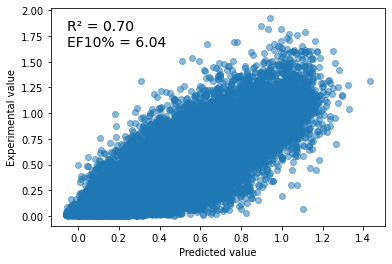

In [3]:
from dynasigml.dynasig_ml_model import DynaSigML_Model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import json

# Running the training and testing of LASSO regression and other ML models (user-specified)
def hard_test():
    with open("test_ids_hard.json") as f:
        test_ids = json.load(f)
    with open("train_ids_hard.json") as f:
        train_ids = json.load(f)
    dsml_model = DynaSigML_Model("combined_dsdf.pickle", test_ids=test_ids, train_ids=train_ids, verbose=True,
                                 ml_models=[RandomForestRegressor(),
                                            GradientBoostingRegressor()],
                                 ml_models_labels=["RF", "GBR"])
    dsml_model.train_test_lasso()
    dsml_model.train_test_ml_models()
    dsml_model.performance_report()
    dsml_model.save_to_file('dsml_model_hard')
    dsml_model.make_graphs('graphs_hard')


def inverted_test():
    with open("test_ids_inverted.json") as f:
        test_ids = json.load(f)
    with open("train_ids_inverted.json") as f:
        train_ids = json.load(f)
    dsml_model = DynaSigML_Model("combined_dsdf.pickle", test_ids=test_ids, train_ids=train_ids, verbose=True,
                                 ml_models=[RandomForestRegressor(),
                                            GradientBoostingRegressor()],
                                 ml_models_labels=["RF", "GBR"])
    dsml_model.train_test_lasso()
    dsml_model.train_test_ml_models()
    dsml_model.performance_report()
    dsml_model.save_to_file('dsml_model_inverted')
    dsml_model.make_graphs('graphs_inverted')


hard_test()
inverted_test()

In [4]:
from dynasigml.dynasig_ml_model import load_dynasigml_model_from_file

# Mapping the LASSO coefficients on the PDB structure
dsml_model = load_dynasigml_model_from_file("dsml_model_inverted.pickle")
dsml_model.map_coefficients("mir125a_variants/mir125a_WT.pdb", "coefficients_inverted.pdb")

dsml_model_hard = load_dynasigml_model_from_file("dsml_model_hard.pickle")
dsml_model_hard.map_coefficients("mir125a_variants/mir125a_WT.pdb", "coefficients_hard.pdb")

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  